In [8]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt  

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/artamonoff/econometrica/refs/heads/main/econometrica-1/datasets/sleep75.csv')
data.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    int64  
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   532 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep     706 non-null    int64 

In [11]:
data.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [14]:
data[ pd.isnull(data['leis1'])].head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq


In [15]:
data['leis1'].unique()

array([3529, 2140, 4595, 3211, 4052, 4812, 4787, 3544, 4359, 4211, 2090,
       6415, 3844, 4379, 4306, 3447, 3876, 3489, 4360, 5447, 3847, 3924,
       4104, 4756, 2680, 3619, 4757, 4904, 4839, 3669, 2746, 3776, 3874,
       4144, 3895, 3009, 3962, 4827, 4009, 5374, 4432, 3687, 4804, 2884,
       4005, 3780, 3564, 4730, 3974, 2757, 2359, 3931, 4112, 4532, 4838,
       5490, 4581, 4334, 4155, 4407, 3794, 4424, 4195, 3959, 5387, 4525,
       3246, 4672, 5421, 4167, 3434, 4207, 5105, 4404, 4688, 4700, 2880,
       3894, 4109, 4679, 6220, 3557, 4128, 4617, 4752, 2900, 4629, 4664,
       3730, 4172, 4967, 4792, 4474, 4779, 4732, 3058, 4202, 2609, 4149,
       4053, 3622, 4137, 4985, 4292, 3510, 6545, 4160, 4275, 4547, 4230,
       3741, 5477, 5187, 4534, 3875, 3765, 3789, 4266, 4177, 4989, 4099,
       4012, 3734, 5027, 4187, 6177, 5474, 3232, 4527, 3739, 4194, 4078,
       2893, 6196, 7267, 4059, 5097, 4291, 4483, 4169, 4014, 4570, 4502,
       2760, 3880, 3901, 5124, 5767, 3574, 6337, 36

In [16]:
data = data.fillna(-1)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    int64  
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   706 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep     706 non-null    int64 

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
data

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,-1.000000,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,-1.000000,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,-1.000000,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,-1.000000,2916


In [20]:
X = data [['leis1', 'age','educ']]
X = pd.get_dummies (X, drop_first=True)
print()
X.head()

,leis1,age,educ
0,3529,32,12
1,2140,31,14
2,4595,44,17
3,3211,30,12
4,4052,64,14


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
le.fit( data['educ'])

LabelEncoder()

In [23]:
X

,leis1,age,educ
0,3529,32,12
1,2140,31,14
2,4595,44,17
3,3211,30,12
4,4052,64,14
...,...,...,...
701,5069,45,12
702,5885,34,10
703,4719,37,12
704,5149,54,17


In [24]:
y = (data['totwrk']>0).astype('int32')
y.head()

0    1
1    1
2    1
3    1
4    1
Name: totwrk, dtype: int32

<Axes: >

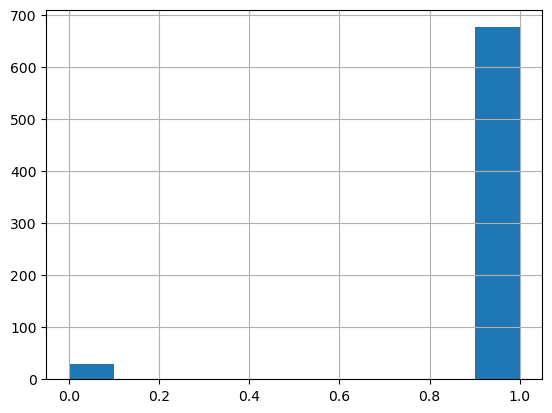

In [25]:
y.hist()

In [26]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [27]:
model = LogisticRegression()

In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
701    1
702    1
703    1
704    1
705    1
Name: totwrk, Length: 706, dtype: int32

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train

,leis1,age,educ
155,3574,26,16
210,5662,29,13
260,4180,23,12
424,5235,37,16
539,7280,28,12
...,...,...,...
71,3434,23,9
106,3510,39,11
270,4654,58,12
435,3686,27,12


In [32]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [33]:
predictions[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [34]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
model.predict_proba(X_test)

array([[2.68949304e-03, 9.97310507e-01],
       [1.13790983e-01, 8.86209017e-01],
       [2.04134348e-07, 9.99999796e-01],
       [1.61261678e-04, 9.99838738e-01],
       [1.48905066e-04, 9.99851095e-01],
       [2.03337393e-04, 9.99796663e-01],
       [2.03327480e-05, 9.99979667e-01],
       [2.55910056e-04, 9.99744090e-01],
       [3.39595562e-03, 9.96604044e-01],
       [4.99585825e-05, 9.99950041e-01],
       [1.70703882e-04, 9.99829296e-01],
       [2.20939986e-06, 9.99997791e-01],
       [7.70704691e-05, 9.99922930e-01],
       [6.79551435e-04, 9.99320449e-01],
       [1.78894015e-04, 9.99821106e-01],
       [3.19113708e-05, 9.99968089e-01],
       [1.61797378e-05, 9.99983820e-01],
       [7.78730973e-03, 9.92212690e-01],
       [1.18163146e-03, 9.98818369e-01],
       [5.04584282e-08, 9.99999950e-01],
       [1.33541697e-04, 9.99866458e-01],
       [4.39536933e-04, 9.99560463e-01],
       [3.09941765e-05, 9.99969006e-01],
       [8.09051051e-06, 9.99991909e-01],
       [3.921761

In [36]:
model.score(X_train, y_train) 

0.9804964539007093

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_test, model.predict(X_test))

0.9818181818181818

In [39]:
f1_score(y_train, model.predict(X_train))

0.989843028624192

In [40]:
model.score(X_test,y_test)

0.9647887323943662